Shape: (3000, 9)
📊 Accuracy: 0.5183333333333333

               precision    recall  f1-score   support

           0       0.38      0.31      0.34       243
           1       0.58      0.66      0.62       357

    accuracy                           0.52       600
   macro avg       0.48      0.48      0.48       600
weighted avg       0.50      0.52      0.51       600



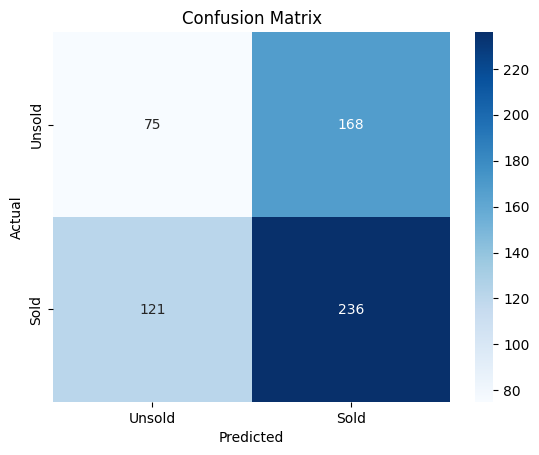

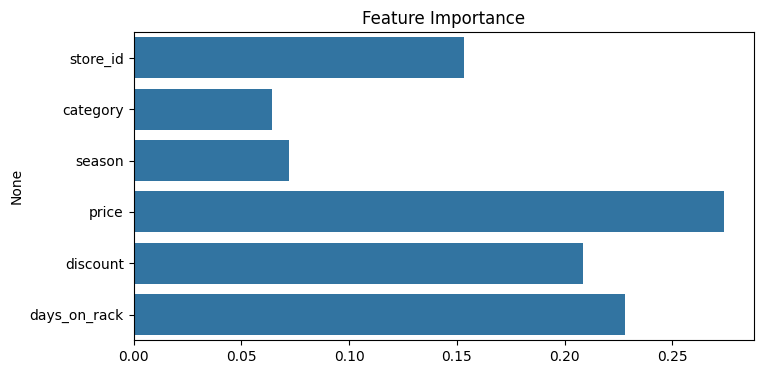

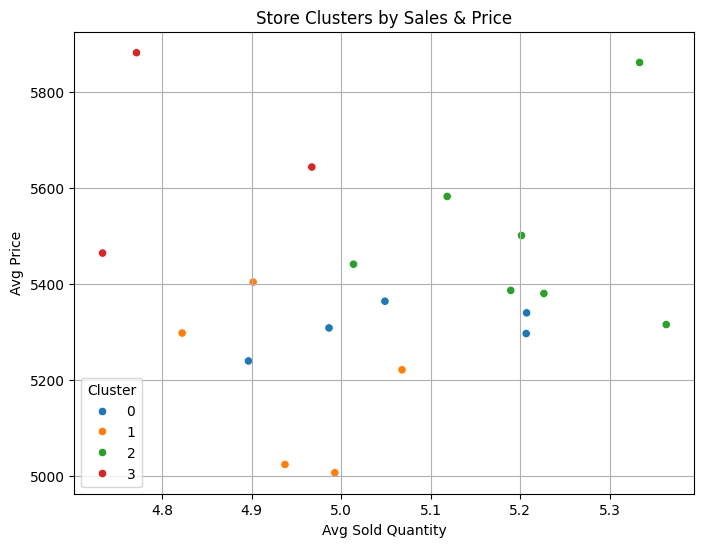

In [ ]:
# ✅ Install dependencies (Colab)
!pip install scikit-learn matplotlib seaborn --quiet

# ✅ Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans

# ✅ Load dataset
df = pd.read_csv('/content/fashion_inventory_dataset.csv')
print("Shape:", df.shape)
df.head()

# ✅ Encode categorical variables
label_cols = ['store_id', 'category', 'season']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# ✅ Classification Part
X = df[['store_id', 'category', 'season', 'price', 'discount', 'days_on_rack']]
y = df['sold_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# ✅ Classification Results
print("📊 Accuracy:", accuracy_score(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unsold', 'Sold'], yticklabels=['Unsold', 'Sold'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Feature Importance
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

# ✅ Clustering Part — Group stores based on demand
store_df = df.groupby('store_id')[['sold_quantity', 'price', 'discount']].mean()
scaler = StandardScaler()
store_scaled = scaler.fit_transform(store_df)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
store_df['Cluster'] = kmeans.fit_predict(store_scaled)

# ✅ Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=store_df, x='sold_quantity', y='price', hue='Cluster', palette='tab10')
plt.title("Store Clusters by Sales & Price")
plt.xlabel("Avg Sold Quantity")
plt.ylabel("Avg Price")
plt.grid()
plt.show()
